In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt

In [2]:
## To read the csv file, we use read_csv function from pandas
df = pd.read_csv('homeprices.csv')
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


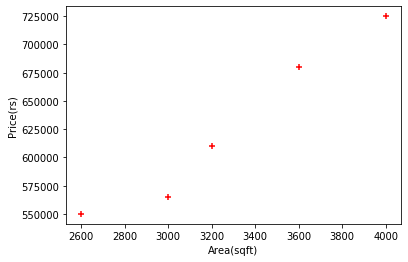

In [3]:
plt.xlabel('Area(sqft)')
plt.ylabel('Price(rs)')
plt.scatter(df.area,df.price,color='red', marker='+')

In [4]:
new_df = df.drop('price',axis='columns')
new_df.head()
## or
## one can also use axis=1 to specify columns.

,area
0,2600
1,3000
2,3200
3,3600
4,4000


In [5]:
price = df.price
price.head()

0    550000
1    565000
2    610000
3    680000
4    725000
Name: price, dtype: int64

In [6]:
# Create linear regression object
reg = linear_model.LinearRegression()
reg.fit(new_df,price)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [7]:
## For making predictions, we use predict function.
reg.predict([[3300]])

array([628715.75342466])

In [8]:
## The equation for the linear model is
##  y = mx+c
## where m=coefficient or slope and c=intercept

In [9]:
## coef_ specifies the coefficient value.
reg.coef_

array([135.78767123])

In [10]:
## intercept_ specifies the intercept value
reg.intercept_

180616.43835616432

In [11]:
3300*135.78767123 + 180616.43835616432

628715.7534151643

In [12]:
reg.predict([[5000]])

array([859554.79452055])

In [13]:
area_df = pd.read_csv("areas.csv")
area_df.head(3)

,area
0,1000
1,1500
2,2300


In [14]:
p = reg.predict(area_df)
p

array([ 316404.10958904,  384297.94520548,  492928.08219178,
        661304.79452055,  740061.64383562,  799808.21917808,
        926090.75342466,  650441.78082192,  825607.87671233,
        492928.08219178, 1402705.47945205, 1348390.4109589 ,
       1144708.90410959])

In [15]:
area_df['prices']=p
area_df

,area,prices
0,1000,3.164041e+05
1,1500,3.842979e+05
2,2300,4.929281e+05
3,3540,6.613048e+05
4,4120,7.400616e+05
5,4560,7.998082e+05
6,5490,9.260908e+05
7,3460,6.504418e+05
8,4750,8.256079e+05
9,2300,4.929281e+05


In [16]:
## to create new csv file, we can use to_csv function.
area_df.to_csv('prediction.csv')